In [113]:
import matplotlib.pyplot as plt
import matplotlib.lines as lines
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import root_mean_squared_error

%matplotlib inline

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score

plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})

In [114]:
data = pd.read_csv("midproc.csv")
data=data.drop(columns=['Unnamed: 0'])

In [115]:
data.head()

,_id,AnimalType,PrimaryColor,SecondaryColor,PrimaryBreed,Sex,Age,IntakeDate,IntakeCondition,IntakeType,IntakeSubtype,OutcomeDate,OutcomeType,OutcomeSubtype,OutcomeCondition,Crossing,Jurisdiction
0,1,DOG,GOLD,GOLD,GOLDEN RETR,NEUTERED,5475.0,2023-07-31 00:00:00,MED R,STRAY,OTC,2023-07-31 00:00:00,NaN,NaN,DEAD,OCALA AVENUE,NaN
1,5,DOG,TAN,WHITE,CHIHUAHUA SH,NEUTERED,6570.0,2024-02-26 00:00:00,MED R,FOSTER,NaN,2024-02-27 00:00:00,RESCUE,MUTTVILLE,MED R,NaN,SAN JOSE
2,6,DOG,TAN,WHITE,CHIHUAHUA SH,NEUTERED,6570.0,2023-08-28 00:00:00,MED R,OWNER SUR,OTC,2024-02-26 00:00:00,FOSTER,FOSTER,MED R,NaN,SAN JOSE
3,11,CAT,GRAY,GRAY,DOMESTIC SH,SPAYED,5840.0,2024-06-16 00:00:00,MED R,STRAY,MEDVET,2024-06-19 00:00:00,RTO,RTO,HEALTHY,ALMADEN EX / MCABEE,SAN JOSE
4,14,DOG,RED,SABLE,SHIBA INU,SPAYED,6205.0,2023-07-01 00:00:00,MED R,STRAY,MEDVET,2023-07-05 00:00:00,RTO,RTO,MED R,BLOSSOM HILL RD. CHICK FIL A,SAN JOSE


In [116]:
data.OutcomeType.unique()

array([nan, 'RESCUE', 'FOSTER', 'RTO', 'EUTH', 'ADOPTION', 'TRANSFER',
       'RTF', 'REQ EUTH', 'DIED', 'LOST EXP', 'FOUND ANIM', 'FOUND EXP',
       'SPAY', 'MISSING'], dtype=object)

In [117]:
data.loc[data['OutcomeType']=='FOSTER']

,_id,AnimalType,PrimaryColor,SecondaryColor,PrimaryBreed,Sex,Age,IntakeDate,IntakeCondition,IntakeType,IntakeSubtype,OutcomeDate,OutcomeType,OutcomeSubtype,OutcomeCondition,Crossing,Jurisdiction
2,6,DOG,TAN,WHITE,CHIHUAHUA SH,NEUTERED,6570.0,2023-08-28 00:00:00,MED R,OWNER SUR,OTC,2024-02-26 00:00:00,FOSTER,FOSTER,MED R,NaN,SAN JOSE
7,20,CAT,BLACK,BLACK,DOMESTIC SH,SPAYED,5475.0,2024-05-28 00:00:00,MED R,OWNER SUR,OTC,2024-07-14 00:00:00,FOSTER,FOSTER,HEALTHY,NaN,SAN JOSE
18,41,CAT,TABBY-BRN,WHITE,DOMESTIC SH,SPAYED,5110.0,2023-09-29 00:00:00,HEALTHY,CONFISCATE,OWNER DIED,2023-11-08 00:00:00,FOSTER,FOSTER,HEALTHY,NaN,SAN JOSE
22,46,DOG,BROWN,SABLE,CHIHUAHUA SH,SPAYED,5110.0,2024-02-15 00:00:00,MED SEV,EUTH REQ,OTC OWNED,2024-02-15 00:00:00,FOSTER,FOSTER,MED SEV,NaN,SAN JOSE
23,50,CAT,TORBI-BRN,TORBI-BRN,DOMESTIC SH,SPAYED,5110.0,2024-06-24 00:00:00,HEALTHY,OWNER SUR,OTC,2024-07-06 00:00:00,FOSTER,FOSTER,HEALTHY,NaN,SAN JOSE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17166,19427,CAT,BLACK,WHITE,DOMESTIC SH,UNKNOWN,91.0,2024-06-30 00:00:00,NURSING,STRAY,OTC,2024-07-15 00:00:00,FOSTER,FOSTER,NURSING,MONTEREY RD X UMBARGER RD,SAN JOSE
17167,19428,CAT,TABBY-BRN,TABBY-BRN,DOMESTIC SH,SPAYED,150.0,2024-06-26 00:00:00,NURSING,STRAY,OTC,2024-08-15 00:00:00,FOSTER,FOSTER,HEALTHY,N 23RD ST / TAYLOR ST,SAN JOSE
17169,19430,CAT,TABBY-BUFF,TABBY-BUFF,DOMESTIC SH,NEUTERED,120.0,2024-06-29 00:00:00,NURSING,STRAY,OTC,2024-07-22 00:00:00,FOSTER,FOSTER,NURSING,MONTEREY RD/ BERNAL RD,SAN JOSE
17177,19438,CAT,ORANGE,ORANGE,DOMESTIC SH,SPAYED,150.0,2024-05-17 00:00:00,MED M,STRAY,OTC,2024-05-31 00:00:00,FOSTER,FOSTER,MED M,JUNE AVE/ MIAMI DR,SAN JOSE


In [118]:
data.OutcomeCondition.unique()

array(['DEAD', 'MED R', 'HEALTHY', 'MED SEV', nan, 'MED M', 'MED EMERG',
       'BEH U', 'FERAL', 'AGGRESSIVE', 'BEH R', 'BEH M', 'NURSING',
       'PREGNANT'], dtype=object)

In [119]:
#creating columns for alive and adopted binary flags
data['o_alive']=np.nan
data['Adopted']=np.nan

In [120]:
for index,row in data.iterrows():
    #if (('DIED' or 'EUTH') in data.loc[index,'OutcomeType']) or ('DEAD' in data.loc[index,'OutcomeCondition']) or (('DIED' or 'EUTH') in data.loc[index,'OutcomeSubtype']):
    #    print(row)
    if 'DIED' == data.loc[index,'OutcomeType'] or 'EUTH' == data.loc[index,'OutcomeType'] or 'DEAD' == data.loc[index,'OutcomeCondition'] or\
    'DIED' == data.loc[index,'OutcomeSubtype'] or 'EUTH' == data.loc[index,'OutcomeSubtype']:
        data.loc[index,'o_alive']=0
    else:
        data.loc[index,'o_alive']=1
    if 'ADOPTION' == data.loc[index,'OutcomeType']:
        data.loc[index,'Adopted']=1
    else:
        data.loc[index,'Adopted']=0

In [121]:
data.head()

,_id,AnimalType,PrimaryColor,SecondaryColor,PrimaryBreed,Sex,Age,IntakeDate,IntakeCondition,IntakeType,IntakeSubtype,OutcomeDate,OutcomeType,OutcomeSubtype,OutcomeCondition,Crossing,Jurisdiction,o_alive,Adopted
0,1,DOG,GOLD,GOLD,GOLDEN RETR,NEUTERED,5475.0,2023-07-31 00:00:00,MED R,STRAY,OTC,2023-07-31 00:00:00,NaN,NaN,DEAD,OCALA AVENUE,NaN,0.0,0.0
1,5,DOG,TAN,WHITE,CHIHUAHUA SH,NEUTERED,6570.0,2024-02-26 00:00:00,MED R,FOSTER,NaN,2024-02-27 00:00:00,RESCUE,MUTTVILLE,MED R,NaN,SAN JOSE,1.0,0.0
2,6,DOG,TAN,WHITE,CHIHUAHUA SH,NEUTERED,6570.0,2023-08-28 00:00:00,MED R,OWNER SUR,OTC,2024-02-26 00:00:00,FOSTER,FOSTER,MED R,NaN,SAN JOSE,1.0,0.0
3,11,CAT,GRAY,GRAY,DOMESTIC SH,SPAYED,5840.0,2024-06-16 00:00:00,MED R,STRAY,MEDVET,2024-06-19 00:00:00,RTO,RTO,HEALTHY,ALMADEN EX / MCABEE,SAN JOSE,1.0,0.0
4,14,DOG,RED,SABLE,SHIBA INU,SPAYED,6205.0,2023-07-01 00:00:00,MED R,STRAY,MEDVET,2023-07-05 00:00:00,RTO,RTO,MED R,BLOSSOM HILL RD. CHICK FIL A,SAN JOSE,1.0,0.0


In [122]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17181 entries, 0 to 17180
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   _id               17181 non-null  int64  
 1   AnimalType        17181 non-null  object 
 2   PrimaryColor      17181 non-null  object 
 3   SecondaryColor    17181 non-null  object 
 4   PrimaryBreed      17181 non-null  object 
 5   Sex               17181 non-null  object 
 6   Age               12073 non-null  float64
 7   IntakeDate        17181 non-null  object 
 8   IntakeCondition   17181 non-null  object 
 9   IntakeType        17181 non-null  object 
 10  IntakeSubtype     13474 non-null  object 
 11  OutcomeDate       17060 non-null  object 
 12  OutcomeType       17055 non-null  object 
 13  OutcomeSubtype    17060 non-null  object 
 14  OutcomeCondition  15818 non-null  object 
 15  Crossing          12748 non-null  object 
 16  Jurisdiction      16636 non-null  object

In [123]:
#date not that useful since all dates are for years 2023-2024, the model is supposed to be a bit more universal than just for a year
#id is useless, condensed outcome columns to only useful ones, outcomedate is also usless + it means outcome already happened while we are trying to predict
#for an arbitrary outcome date
data = data.drop(columns=['IntakeDate','_id','OutcomeType','OutcomeSubtype','OutcomeCondition','OutcomeDate'])

In [124]:
data

,AnimalType,PrimaryColor,SecondaryColor,PrimaryBreed,Sex,Age,IntakeCondition,IntakeType,IntakeSubtype,Crossing,Jurisdiction,o_alive,Adopted
0,DOG,GOLD,GOLD,GOLDEN RETR,NEUTERED,5475.0,MED R,STRAY,OTC,OCALA AVENUE,NaN,0.0,0.0
1,DOG,TAN,WHITE,CHIHUAHUA SH,NEUTERED,6570.0,MED R,FOSTER,NaN,NaN,SAN JOSE,1.0,0.0
2,DOG,TAN,WHITE,CHIHUAHUA SH,NEUTERED,6570.0,MED R,OWNER SUR,OTC,NaN,SAN JOSE,1.0,0.0
3,CAT,GRAY,GRAY,DOMESTIC SH,SPAYED,5840.0,MED R,STRAY,MEDVET,ALMADEN EX / MCABEE,SAN JOSE,1.0,0.0
4,DOG,RED,SABLE,SHIBA INU,SPAYED,6205.0,MED R,STRAY,MEDVET,BLOSSOM HILL RD. CHICK FIL A,SAN JOSE,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17176,DOG,BLACK,WHITE,ALASK MALAMUTE,MALE,1095.0,HEALTHY,STRAY,FIELD,N 8TH / SANTA CLARA,SAN JOSE,1.0,0.0
17177,CAT,ORANGE,ORANGE,DOMESTIC SH,SPAYED,150.0,MED M,STRAY,OTC,JUNE AVE/ MIAMI DR,SAN JOSE,1.0,0.0
17178,CAT,ORANGE,ORANGE,DOMESTIC SH,NEUTERED,150.0,HEALTHY,FOSTER,NaN,MONTEREY RD,SAN JOSE,1.0,1.0
17179,CAT,ORANGE,ORANGE,DOMESTIC SH,NEUTERED,150.0,MED R,STRAY,OTC,KENTRIDGE DR X FRANCIS DR,SAN JOSE,1.0,0.0


<BarContainer object of 2 artists>

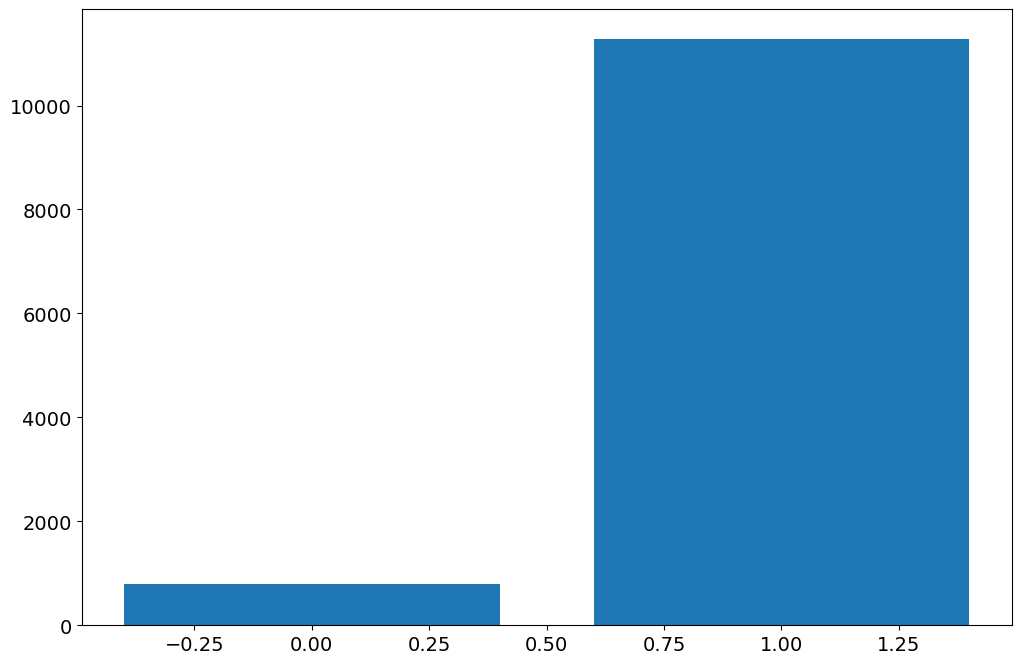

In [125]:
#serious class imbalance
#keep it adoptions only, since resource management shtick doesnt work anyway due to fosters and transfers not being taken into considertion
plt.bar(data.groupby(['o_alive']).groups.keys(),data.groupby(['o_alive']).count()['Age'])

<BarContainer object of 2 artists>

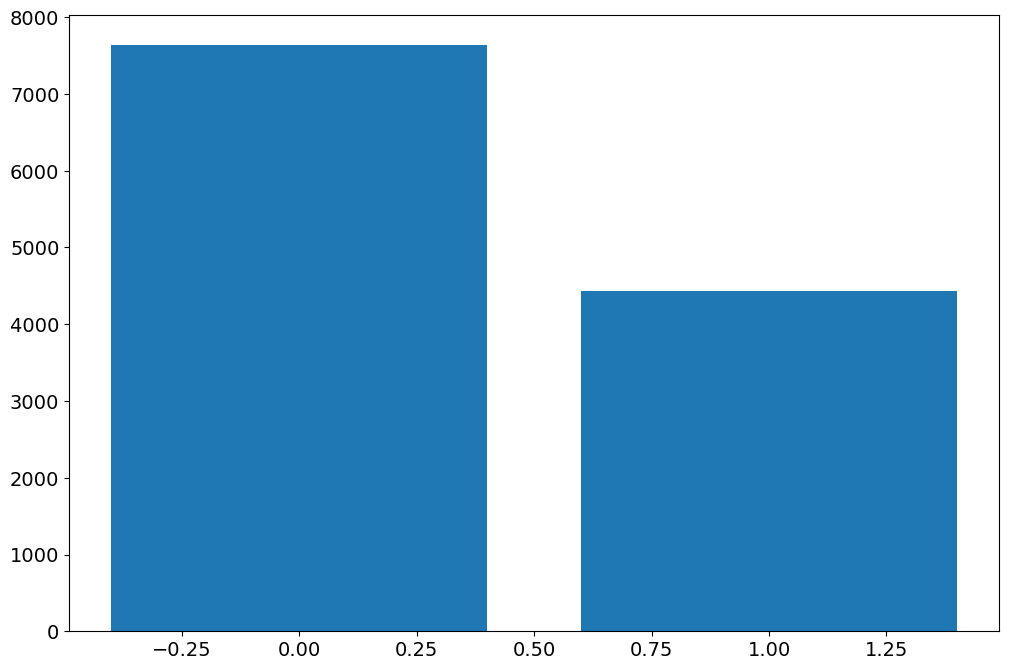

In [126]:
#a bit better
plt.bar(data.groupby(['Adopted']).groups.keys(),data.groupby(['Adopted']).count()['Age'])

In [127]:
data = data.drop(columns=['o_alive','Crossing'])

In [128]:
data.AnimalType.unique()

array(['DOG', 'CAT', 'OTHER', 'BIRD', 'LIVESTOCK'], dtype=object)

In [129]:
data.Jurisdiction.unique()

array([nan, 'SAN JOSE', 'COUNTY', 'LOS GATOS', 'MILPITAS', 'SUNNYVALE',
       'CAMPBELL', 'CUPERTINO', 'SANTA CLARA', 'OUT OF COUNTY',
       'SARATOGA', 'MORGAN HILL', 'MOUNTAIN VIEW', 'MONTE SERENO',
       'PALO ALTO'], dtype=object)

In [130]:
data.Jurisdiction.fillna('SAN JOSE', inplace=True)

In [131]:
data

,AnimalType,PrimaryColor,SecondaryColor,PrimaryBreed,Sex,Age,IntakeCondition,IntakeType,IntakeSubtype,Jurisdiction,Adopted
0,DOG,GOLD,GOLD,GOLDEN RETR,NEUTERED,5475.0,MED R,STRAY,OTC,SAN JOSE,0.0
1,DOG,TAN,WHITE,CHIHUAHUA SH,NEUTERED,6570.0,MED R,FOSTER,NaN,SAN JOSE,0.0
2,DOG,TAN,WHITE,CHIHUAHUA SH,NEUTERED,6570.0,MED R,OWNER SUR,OTC,SAN JOSE,0.0
3,CAT,GRAY,GRAY,DOMESTIC SH,SPAYED,5840.0,MED R,STRAY,MEDVET,SAN JOSE,0.0
4,DOG,RED,SABLE,SHIBA INU,SPAYED,6205.0,MED R,STRAY,MEDVET,SAN JOSE,0.0
...,...,...,...,...,...,...,...,...,...,...,...
17176,DOG,BLACK,WHITE,ALASK MALAMUTE,MALE,1095.0,HEALTHY,STRAY,FIELD,SAN JOSE,0.0
17177,CAT,ORANGE,ORANGE,DOMESTIC SH,SPAYED,150.0,MED M,STRAY,OTC,SAN JOSE,0.0
17178,CAT,ORANGE,ORANGE,DOMESTIC SH,NEUTERED,150.0,HEALTHY,FOSTER,NaN,SAN JOSE,1.0
17179,CAT,ORANGE,ORANGE,DOMESTIC SH,NEUTERED,150.0,MED R,STRAY,OTC,SAN JOSE,0.0


In [132]:
data.IntakeSubtype.fillna(data.IntakeType,inplace=True)

In [133]:
data

,AnimalType,PrimaryColor,SecondaryColor,PrimaryBreed,Sex,Age,IntakeCondition,IntakeType,IntakeSubtype,Jurisdiction,Adopted
0,DOG,GOLD,GOLD,GOLDEN RETR,NEUTERED,5475.0,MED R,STRAY,OTC,SAN JOSE,0.0
1,DOG,TAN,WHITE,CHIHUAHUA SH,NEUTERED,6570.0,MED R,FOSTER,FOSTER,SAN JOSE,0.0
2,DOG,TAN,WHITE,CHIHUAHUA SH,NEUTERED,6570.0,MED R,OWNER SUR,OTC,SAN JOSE,0.0
3,CAT,GRAY,GRAY,DOMESTIC SH,SPAYED,5840.0,MED R,STRAY,MEDVET,SAN JOSE,0.0
4,DOG,RED,SABLE,SHIBA INU,SPAYED,6205.0,MED R,STRAY,MEDVET,SAN JOSE,0.0
...,...,...,...,...,...,...,...,...,...,...,...
17176,DOG,BLACK,WHITE,ALASK MALAMUTE,MALE,1095.0,HEALTHY,STRAY,FIELD,SAN JOSE,0.0
17177,CAT,ORANGE,ORANGE,DOMESTIC SH,SPAYED,150.0,MED M,STRAY,OTC,SAN JOSE,0.0
17178,CAT,ORANGE,ORANGE,DOMESTIC SH,NEUTERED,150.0,HEALTHY,FOSTER,FOSTER,SAN JOSE,1.0
17179,CAT,ORANGE,ORANGE,DOMESTIC SH,NEUTERED,150.0,MED R,STRAY,OTC,SAN JOSE,0.0


In [134]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17181 entries, 0 to 17180
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   AnimalType       17181 non-null  object 
 1   PrimaryColor     17181 non-null  object 
 2   SecondaryColor   17181 non-null  object 
 3   PrimaryBreed     17181 non-null  object 
 4   Sex              17181 non-null  object 
 5   Age              12073 non-null  float64
 6   IntakeCondition  17181 non-null  object 
 7   IntakeType       17181 non-null  object 
 8   IntakeSubtype    17181 non-null  object 
 9   Jurisdiction     17181 non-null  object 
 10  Adopted          17181 non-null  float64
dtypes: float64(2), object(9)
memory usage: 1.4+ MB


In [135]:
np.mean(data.Age)

773.2402882465004

In [136]:
773/365

2.117808219178082

In [137]:
#non-imputed dataset creation
data_removed=data.dropna()

In [138]:
data_removed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12073 entries, 0 to 17179
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   AnimalType       12073 non-null  object 
 1   PrimaryColor     12073 non-null  object 
 2   SecondaryColor   12073 non-null  object 
 3   PrimaryBreed     12073 non-null  object 
 4   Sex              12073 non-null  object 
 5   Age              12073 non-null  float64
 6   IntakeCondition  12073 non-null  object 
 7   IntakeType       12073 non-null  object 
 8   IntakeSubtype    12073 non-null  object 
 9   Jurisdiction     12073 non-null  object 
 10  Adopted          12073 non-null  float64
dtypes: float64(2), object(9)
memory usage: 1.1+ MB


In [139]:
data_removed.to_csv('ready_drop.csv', index=False)

In [140]:
#impute with mean age for imputed dataset
data_imputed=data.Age.fillna(np.mean(data.Age),inplace=True)

In [ ]:
data_imputed.to_csv('ready_impute.csv', index=False)